## Loan Approval Prediction

This notebook contains the Loan Approval Prediction project. This project is part of the online hackathon organized by Analytics Vidhya. 

### Problem statement
"Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers."

### Inference from statement
Binary classification problem where we have to predict whether a loan will be approved or not.  The dependent variable or target variable is the Loan_Status, while the rest are independent variable or features. We need to develop a model using the features to predict the target variable.







### Dataset

Dataset obtained from Kaggle/Analytics Vidhya on their Hackathon page.There are 13 columns of features and 614 rows of records in the training set. For evaluation purpose, we are using 20 % of the  training set for testing.


| No | ColumnName|Decription|
| :- | :- | :- |
| 1 | Loan_ID| Unique Loan ID |
| 2 | Gender  |  Male / Female  |
| 3 |  Married | Applicant married (Y/N)  |
| 4 | Dependents  |   Number of dependents (0, 1, 2, 3+) |
| 5 | Education  |    Applicant Education (Graduate / Under Graduate) |
| 6 | Self_Employed  |   Self employed (Y/N) |
| 7 | ApplicantIncome  | Applicant income  |
| 8 | CoapplicantIncome  |  Coapplicant income |
| 9 |  LoanAmount |  Loan amount in thousands |
| 10 | Loan_Amount_Term   |  Term of loan in months |
| 11 | Credit_History  | credit history meets guidelines (0, 1) |
| 12 | Property_Area  |   Urban / Semi Urban / Rural |
| 13 | Loan_Status  |   Loan approved (Y/N) |

### Exploratory Data Analysis

Python is used to explore the data to understand its features and  target variable distribution.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from collections import Counter

%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

/Users/Srikala/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# using pandas to read the data 
data=pd.read_csv("loan_set.csv") 

In [3]:
# first 5 rows are displayed
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Gives an overview of datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [42]:
# describes the statistics of the numerical attributes
data.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001259,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [ ]:
#lists the datatypes
data.dtypes


In [7]:
# size of rows,columns
data.shape

(614, 13)

In [8]:
# displays the missing value count for each feature
data.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Univariate Analysis

Analysing each variable individually. For categorical features we can use pie chart or  bar plots which will display the number/percentage of each category of a particular variable. For numerical features, a histogram can be used to look at the distribution of the variable.

#### Target Variable (Categorical) - Loan_Status

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

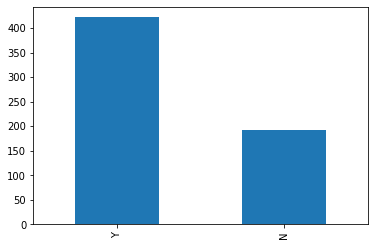

In [9]:
# bar plot to visualize the frequency
## Data is not that imbalanced
data['Loan_Status'].value_counts(normalize = False).plot(kind = 'bar')
data['Loan_Status'].value_counts(normalize=True)

#### Inference from the above plot:
- Loan was approved 69% of the time.
- Data is not imbalanced.Hence no balancing part needed. Hence accuracy as a metrics should work fine.

### Independent Categorical Variables

5 features that are categorical or binary (Gender, Married, Self_Employed, Credit_History, Education)

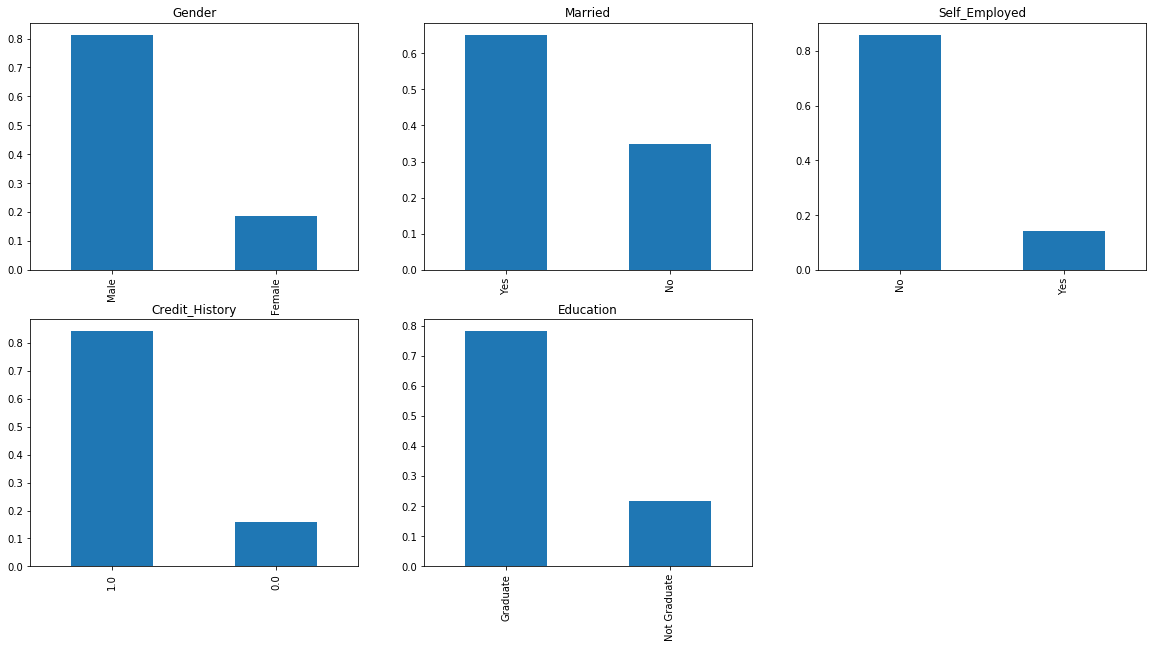

In [10]:
# Visualizing categorical features
# plt.figure(1)
plt.subplot(231)
data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
data['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
data['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
data['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
data['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

### Inference from the above plots:

- 80% of the applicants are male.
- 65% of the applicants are married.
- 15% of the applicants are self employed.
- 85% of the applicants meet the guidelines(credit history)
- 80% of the applicants are graduate.

### Independent Variables (Ordinal)
Two ordinal features - Dependents, Property_Area


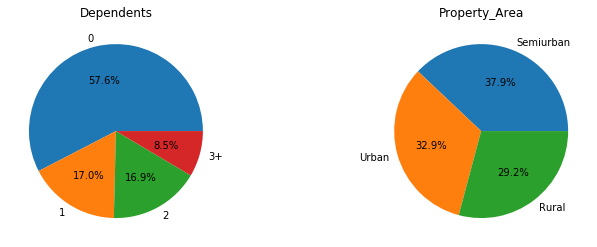

In [11]:
plt.subplot(121)
data['Dependents'].value_counts(normalize=True).plot.pie(title='Dependents',figsize=(12,4), autopct='%1.1f%%')
plt.ylabel("")
plt.subplot(122)
data['Property_Area'].value_counts(normalize=True).plot.pie(title='Property_Area',figsize=(12,4), autopct='%1.1f%%')
plt.ylabel("")
plt.show()

### Inference from the above charts:

- More than 55% of the applicants have zero dependents.
- Applicants from rural area account for the least amount.


### Independent Variable (Numerical)
4 features that are Numerical: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term

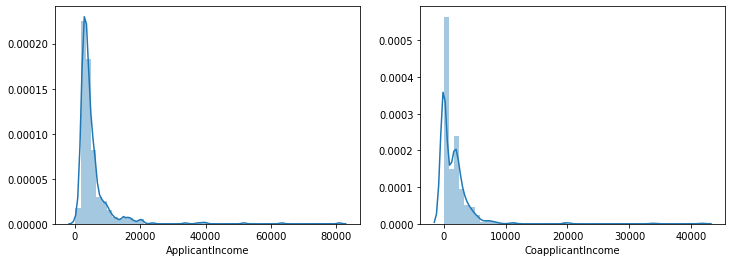

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'])
plt.subplot(122)
sns.distplot(data['CoapplicantIncome']);

plt.show()

- Both ApplicantIncome and CoApplicantIncome distributions looks like right skewed (tail towards right).
- The values can be normalized by taking log.


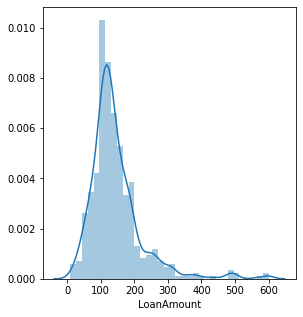

In [13]:

plt.figure(figsize=(10,5))
plt.subplot(121)
df=data.dropna()
sns.distplot(df['LoanAmount']);


- Distribution looks rightly skewed.

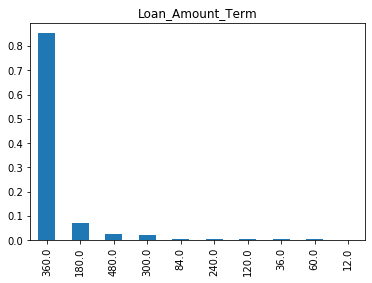

In [14]:
data['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')

- Around 85% of the loans are 360 months term or 30 years period

## Data Preprocessing

- Data pre-processing is basically data cleaning technique.
- Missing values are filled.
- Categorical variables converted to numerical data using encoding.
- Unnecessary data is dropped.


In [15]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
# Converting int type data to float.
data['ApplicantIncome'] = data['ApplicantIncome'].astype('float64')
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [17]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y



#### Handling numerical  data first

The data set is split to categorical and float set.

In [18]:
float_data = data.loc[:,data.dtypes == np.float64]
category_data = data.loc[:,data.dtypes == np.object]


In [19]:
float_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


In [20]:
## finding the null value counts
float_data.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [21]:
# Filling the missing values with Mean for each numerical feature
for i in float_data:
    float_data[i].fillna(value = float_data[i].mean(), inplace = True)

In [22]:
## finding the null value counts after filling with mean
float_data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

### Handing categorical data

In [23]:
category_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [24]:
# checking for missing values
category_data.isnull().sum() 

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [25]:
# Filling the missing values with Mode for each categorical feature
for i in category_data:
    category_data[i].fillna(value = category_data[i].mode()[0], inplace = True)

In [26]:
# checking for missing values after filling with mode
category_data.isnull().sum() 

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [27]:
category_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [28]:
# dropping the 'Loan_Id' column as being unique value,will not contribute for the learning
del category_data['Loan_ID']

In [29]:
category_data.head() # after dropping the column Loan_ID

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [30]:
#creating a dictionary with encoded values
code_numeric = {'Male': 0, 'Female': 1,
'Yes': 1, 'No': 0,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 4}
encoded_data = category_data.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)


In [31]:
encoded_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0,0,0,1,0,3,1
1,0,1,1,1,0,1,0
2,0,1,0,1,1,3,1
3,0,1,0,2,0,3,1
4,0,0,0,1,0,3,1


In [32]:
encoded_data.dtypes

Gender            int64
Married           int64
Dependents       object
Education         int64
Self_Employed     int64
Property_Area     int64
Loan_Status       int64
dtype: object

In [33]:
# Dependents still object type, so converting to numerical
encoded_data['Dependents']=pd.to_numeric(encoded_data.Dependents)

In [34]:
encoded_data.dtypes

Gender           int64
Married          int64
Dependents       int64
Education        int64
Self_Employed    int64
Property_Area    int64
Loan_Status      int64
dtype: object

In [35]:
### Concatenating the numerical and encoded data to a single data frame
processed_data = pd.concat([float_data,encoded_data], axis = 1)

In [36]:
processed_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849.0,0.0,146.412162,360.0,1.0,0,0,0,1,0,3,1
1,4583.0,1508.0,128.000000,360.0,1.0,0,1,1,1,0,1,0
2,3000.0,0.0,66.000000,360.0,1.0,0,1,0,1,1,3,1
3,2583.0,2358.0,120.000000,360.0,1.0,0,1,0,2,0,3,1
4,6000.0,0.0,141.000000,360.0,1.0,0,0,0,1,0,3,1


In [37]:
# Separating out the target
Y = processed_data['Loan_Status'].values
del processed_data['Loan_Status']

In [38]:
processed_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,5849.0,0.0,146.412162,360.0,1.0,0,0,0,1,0,3
1,4583.0,1508.0,128.000000,360.0,1.0,0,1,1,1,0,1
2,3000.0,0.0,66.000000,360.0,1.0,0,1,0,1,1,3
3,2583.0,2358.0,120.000000,360.0,1.0,0,1,0,2,0,3
4,6000.0,0.0,141.000000,360.0,1.0,0,0,0,1,0,3


In [39]:
X=processed_data.copy()
X.head() # x has data alone with no labels

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,5849.0,0.0,146.412162,360.0,1.0,0,0,0,1,0,3
1,4583.0,1508.0,128.000000,360.0,1.0,0,1,1,1,0,1
2,3000.0,0.0,66.000000,360.0,1.0,0,1,0,1,1,3
3,2583.0,2358.0,120.000000,360.0,1.0,0,1,0,2,0,3
4,6000.0,0.0,141.000000,360.0,1.0,0,0,0,1,0,3


Heatmap is used to check the correlation between all the variables. We can use the corr() to compute pairwise correlation of columns.Heatmaps visualize data through variations in coloring. Darker the  color, higher the corelation.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.058809,0.051708,0.134080,-0.140760,0.127180,-0.009500
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,-0.082912,0.075948,0.034780,-0.062290,-0.016100,0.010522
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.107930,0.147141,0.170666,-0.166998,0.115260,-0.044776
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,0.073567,-0.100863,-0.101674,-0.077242,-0.033943,-0.077620
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.012819,0.005852,-0.044303,-0.077936,-0.002260,-0.001880
Gender,-0.058809,-0.082912,-0.107930,0.073567,-0.012819,1.000000,-0.364569,-0.165877,-0.045364,0.000525,0.025752
Married,0.051708,0.075948,0.147141,-0.100863,0.005852,-0.364569,1.000000,0.308408,0.012304,0.004489,0.004257
Dependents,0.134080,0.034780,0.170666,-0.101674,-0.044303,-0.165877,0.308408,1.000000,0.059001,0.048028,-0.012006
Education,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.045364,0.012304,0.059001,1.000000,-0.010383,-0.065243
Self_Employed,0.127180,-0.016100,0.115260,-0.033943,-0.002260,0.000525,0.004489,0.048028,-0.010383,1.000000,-0.030860


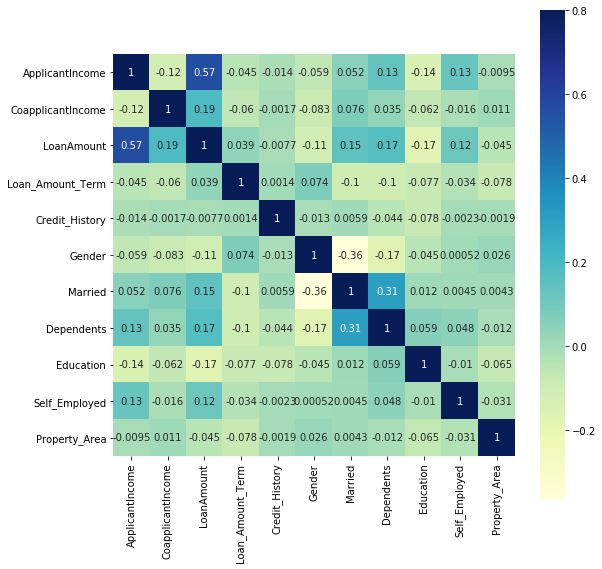

In [43]:
corrmat=X.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True,annot=True, cmap="YlGnBu")
corrmat

## Model Development
The following models are used
- Logistic Regression
- Decision Tree
- Random Forest
- SVM

In [41]:

# importing the required metric libraries

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score

# function to display confusion matrix
def conf_matrix(test,pred):
    cm = confusion_matrix(test, pred,) # rows = truth, cols = prediction
    df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
    plt.figure(figsize = (3,3))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu")
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# function to compute and print accuracy
def accuracy(test,pred):
    print('Accuracy: ', metrics.accuracy_score(test, pred))
    print("Classification Report")
    print(classification_report(pred, test))

### Logistic Regression

In [42]:
 # importing required libraries for logistic regression
from sklearn.linear_model import LogisticRegression


#split x and y data into train/test sets
x_train, x_test, y_train, y_test = train_test_split(X,
                                  Y,
                                  test_size=0.2,
                                  random_state=1)

logistic_regression= LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_pred=logistic_regression.predict(x_test) 
accuracy(y_test, y_pred)


Accuracy:  0.7967479674796748
Classification Report
              precision    recall  f1-score   support

           0       0.41      0.89      0.56        18
           1       0.98      0.78      0.87       105

    accuracy                           0.80       123
   macro avg       0.69      0.83      0.71       123
weighted avg       0.89      0.80      0.82       123



Test Data Accuracy using Logistic Regression: 0.7967


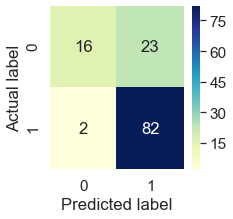

In [43]:
## Plotting the confusion matrix using defined function conf_matrix
conf_matrix(y_test, y_pred,) # rows = truth, cols = prediction

print("Test Data Accuracy using Logistic Regression: %0.4f" % accuracy_score(y_test, y_pred))

### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
y_pred=decision_tree.predict(x_test) 
accuracy(y_test,y_pred)


Accuracy:  0.7154471544715447
Classification Report
              precision    recall  f1-score   support

           0       0.56      0.55      0.56        40
           1       0.79      0.80      0.79        83

    accuracy                           0.72       123
   macro avg       0.67      0.67      0.67       123
weighted avg       0.71      0.72      0.71       123



Test Data Accuracy using Decision Tree: 0.7154


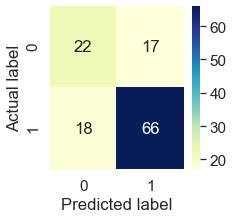

In [45]:
## Plotting the confusion matrix using defined function conf_matrix
conf_matrix(y_test, y_pred,) # rows = truth, cols = prediction
print("Test Data Accuracy using Decision Tree: %0.4f" % accuracy_score(y_test, y_pred))

### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test) 
accuracy(y_pred, y_test)


Accuracy:  0.7642276422764228
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.44      0.54        39
           1       0.78      0.92      0.84        84

    accuracy                           0.76       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.76      0.76      0.75       123



Test Data Accuracy using Random Forest: 0.7642


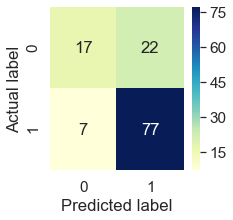

In [47]:
## Plotting the confusion matrix using defined function conf_matrix
conf_matrix(y_test, y_pred,) # rows = truth, cols = prediction
print("Test Data Accuracy using Random Forest: %0.4f" % accuracy_score(y_test, y_pred))

### Support Vector Machine

In [ ]:
from sklearn import svm
classifier=svm.SVC(kernel='linear', C=1,gamma='auto')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy(y_test,y_pred)


In [ ]:
## Plotting the confusion matrix using defined function conf_matrix
conf_matrix(y_test, y_pred,) # rows = truth, cols = prediction
print("Test Data Accuracy using Random Forest: %0.4f" % accuracy_score(y_test, y_pred))


### Conclusion

We have made an attempt to develop  models for loan approval prediction problem.Being a binary classification, the following models were tried. Results are summarized in the table. It can be seen that a simple model like Logistic Regression outperforms the other models.


| No | Model | Accuracy|
| :- | :- | :- |
| 1| Logistic Regression| .80 |
| 2| Decision Tree| .72 |
| 3| Random Forest| .78 |
| 4| Support Vector Machine | .78 |

#### Suggestions for Improvement. 
- Feature Engineering - model can be improved by creating new features. Maybe combining ApplicantIncome and CoApplicanIncome.
- This dataset is limited to 614 rows. A larger dataset will definitely help in improvising the model.
- Bivariate analysis to determine variable dependence and discover more insights.
- Hyperparameter tuning - tuning the model features.
- Ensemble modeling - combining  multiple models.
- Neural networks as last option. As this is a simple classification problem and a simple model like logistic regression seems to work fine, trying with a complex model like NN should be the last option.

